In [15]:
import pandas as pd
from metpy.units import units
from metpy.calc import (wind_components, wind_speed, wind_direction, relative_humidity_from_mixing_ratio, 
                        mixing_ratio_from_specific_humidity)
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import numpy as np
import xarray as xr
import pytz
from wrf import latlon_coords

In [16]:
def nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def plot_station_winds(data, date_time, stations, outdir):    
    
    
    # Create a new figure
    fig = plt.figure(figsize=(20, 20))       
    gs = plt.GridSpec(len(stations), 1, figure=fig, hspace= 0.5, wspace=0.55)
    
    for i in range(len(stations)):
    
        # subplot for winds
        ax = fig.add_subplot(gs[i,0])

        # plot wind speed    
        ln1 = ax.plot(date_time, data.wspd.sel(station = stations[i]), 'rebeccapurple', label='Wind Speed')
        #ax.fill_between(date_time, wspd, color = 'rebeccapurple')

        ax.set_ylabel('Wind Speed [m s-1]', multialignment='center')
        #ax.set_ylim(0, np.nanmax(wgust))

        # plot wind gusts
        ln2 = ax.plot(date_time, data.wgust.sel(station = stations[i]), 'lightsalmon', label='Wind Gusts')

        # plot wind directions, adding a second y axis
        ax1 = ax.twinx()
        ln3 = ax1.plot(date_time, data.wdir.sel(station = stations[i]), '.k', linewidth=0.5, label='Wind Direction')
        ax1.set_ylabel('Wind Direction [degrees]', multialignment='center') 
        ax1.set_ylim(0, 360)

        ax1.set_yticks([0, 90, 180, 270, 360])

        labels = [item.get_text() for item in ax1.get_yticklabels()]
        labels = ['N','E','S','W','N']
        ax1.set_yticklabels(labels)

        # make x laeled dates prettier
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y %H PDT'))

        # apply grid
        ax.grid(b=True, which='major', axis='y', color='k', linestyle='--', linewidth=0.5)

        plt.title(stations[i], loc = 'right')

        
        if (i == 0):
            # add legend
            lns = ln1 + ln2 + ln3
            #lns = ln1 + ln3
            labs = [l.get_label() for l in lns]
            ax.legend(lns, labs, loc='upper left', bbox_to_anchor=(0, 1.25), ncol=3, prop={'size': 12})

   
    # Save and display figure
#     plot_name = station + '_station_winds_n_temps_' + "{:%Y_%m_%d_%H}".format(date_time[0]) + \
#                 '_to_' + "{:%Y_%m_%d_%H}".format(date_time[-1]) + '.png'
#     plt.savefig(outdir+plot_name,  bbox_inches='tight', dpi = 120)
    plt.show()
#     print('File saved as:', outdir+plot_name, '\n')

def plot_station_winds_n_temps(T, dewT, RH, wspd, wdir, wgust, date_time, station, outdir):    
    
    # Create a new figure
    fig = plt.figure(figsize=(20, 10))       
    gs = plt.GridSpec(3, 1, figure=fig, hspace= 0.5, wspace=0.55)

    # subplot for winds
    ax = fig.add_subplot(gs[0,0])

    # plot wind speed    
    ln1 = ax.plot(date_time, wspd, 'rebeccapurple', label='Wind Speed')
    #ax.fill_between(date_time, wspd, color = 'rebeccapurple')

    ax.set_ylabel('Wind Speed [m s-1]', multialignment='center')
    #ax.set_ylim(0, np.nanmax(wgust))
    
    # plot wind gusts
    ln2 = ax.plot(date_time, wgust, 'lightsalmon', label='Wind Gusts')

    # plot wind directions, adding a second y axis
    ax1 = ax.twinx()
    ln3 = ax1.plot(date_time, wdir, '.k', linewidth=0.5, label='Wind Direction')
    ax1.set_ylabel('Wind Direction [degrees]', multialignment='center') 
    ax1.set_ylim(0, 360)
    
    ax1.set_yticks([0, 90, 180, 270, 360])
    
    labels = [item.get_text() for item in ax1.get_yticklabels()]
    labels = ['N','E','S','W','N']
    ax1.set_yticklabels(labels)

    # make x laeled dates prettier
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y %H PDT'))

    # apply grid
    ax.grid(b=True, which='major', axis='y', color='k', linestyle='--', linewidth=0.5)

    # add legend
    lns = ln1 + ln2 + ln3
    #lns = ln1 + ln3
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, prop={'size': 12})

    #--------------------------------------------------------------------------------------------------# 
    '''
    # subplot for winds
    ax = fig.add_subplot(gs[1,0])

    # plot wind speed    
    #ln1 = ax.plot(date_time, wspd, 'rebeccapurple', label='Wind Speed')
    #ax.fill_between(date_time, wspd, color = 'rebeccapurple')

    ax.set_ylabel('Wind Gusts [m s-1]', multialignment='center')

    # plot wind gusts
    ln2 = ax.plot(date_time, wgust, 'darkblue', label='Wind Gusts')

    # plot wind directions, adding a second y axis
    ax2 = ax.twinx()
    ln3 = ax2.plot(date_time, wdir, '.k', linewidth=0.5, label='Wind Direction')
    ax2.set_ylabel('Wind Direction [degrees]', multialignment='center') 
    ax2.set_ylim(0, 360)

    # make x laeled dates prettier
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y %H PDT'))

    # apply grid
    ax.grid(b=True, which='major', axis='y', color='k', linestyle='--', linewidth=0.5)

    # add legend
    #lns = ln1 + ln2 + ln3
    lns = ln2 + ln3
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, prop={'size': 12})
    '''
    #--------------------------------------------------------------------------------------------------# 
    
    # subplot for temps
    ax2 = fig.add_subplot(gs[1,0])

    # plot temps    
    ln1 = ax2.plot(date_time, T, 'firebrick', label='Temperature')
    #ax2.fill_between(date_time, T, color = 'r')
    
    # plot dew point temps    
    ln2 = ax2.plot(date_time, dewT, 'mediumblue', label='Dew Point Temperature')

    ax2.set_ylabel('Temperature [°C]', multialignment='center')

    # plot relative humidity, adding a second y axis
    ax3 = ax2.twinx()
    ln3 = ax2.plot(date_time, RH, 'darkcyan', linewidth=0.5, label='Relative Humidity')
    ax3.set_ylabel('Relative Humidity [%]', multialignment='center')
    ax3.set_ylim(0, 100)
    
    # make x laeled dates prettier
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y %H PDT'))

    # apply grid
    ax2.grid(b=True, which='major', axis='y', color='k', linestyle='--', linewidth=0.5)

    # add legend
    lns = ln1 + ln2 + ln3
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, 1.18), ncol=3, prop={'size': 12})

    fig.suptitle(station, fontsize = 16, x = 0.515, y = 0.95)
    
    # Save and display figure
#     plot_name = station + '_station_winds_n_temps_' + "{:%Y_%m_%d_%H}".format(date_time[0]) + \
#                 '_to_' + "{:%Y_%m_%d_%H}".format(date_time[-1]) + '.png'
#     plt.savefig(outdir+plot_name,  bbox_inches='tight', dpi = 120)
    plt.show()
#     print('File saved as:', outdir+plot_name, '\n')

In [17]:
def plot_station_barbs(data, date_time, var_key, stations, y_pos, data_units, cmap_levels, 
                       skip, data_key, figsize, lab, outdir):    
    
    cmap_spec = mpl.cm.jet
    norm = mpl.colors.Normalize(vmin=cmap_levels[0], vmax=cmap_levels[1])
    
    # Create a new figure
    fig, ax = plt.subplots(1,1, figsize=figsize)
    
    for i in range(len(stations)):

        # plot barbs for each station on a different line
        br = ax.barbs(date_time[::skip], (np.ones(len(date_time)) * y_pos[i])[::skip], \
                 data.u.sel(station = stations[i])[::skip], data.v.sel(station = stations[i])[::skip], \
                 data[var_key].sel(station = stations[i])[::skip], cmap=cmap_spec, norm = norm, sizes=dict(emptybarb=0.1, spacing=0.2, height=0.5))

        # find missing values and plot them as x's
        missing = (np.isfinite(data[var_key].sel(station = stations[i]).values) == False).astype(int) * 40
        plt.scatter(date_time[::skip], (np.ones(len(date_time)) * y_pos[i])[::skip], missing[::skip], marker = 'x', color = 'gray')
        
        ax.set_yticks(y_pos)
        ax.set_ylim(np.min(y_pos) - 0.5, np.max(y_pos) + 0.5)
        
        labels = [item.get_text() for item in ax.get_yticklabels()]
        labels = stations
        ax.set_yticklabels(labels)

        # make x laeled dates prettier
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%H'))

    ax.text(0.005, 0.02, lab, fontsize = 15, transform = ax.transAxes)

        
    plt.title('(' + str(date_time['time.month'].values[0]) + '/' + str(date_time['time.year'].values[0]) + ')', 
              loc = 'right')
        
    ax2 = fig.add_axes([0.91, 0.15, 0.009, 0.7])

#     cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap_spec,
#                                 norm=norm, orientation='vertical')
    cb = plt.colorbar(br, cax=ax2,
                        orientation='vertical', extendfrac='auto', label = data_units)


   
    # Save and display figure
    plot_name = data_key + '_' + var_key + '_' + str(skip) + 'hrly_' + str(date_time.values[0])[:-16].replace('T', '_') + \
                '_to_' + str(date_time.values[-1])[:-16].replace('T', '_') + '.png'
    plt.savefig(outdir+plot_name,  bbox_inches='tight', dpi = 120)
    plt.show()
    print('File saved as:', outdir+plot_name, '\n')

In [36]:
wnd_units = 'km/hr'

# set filepath
datadir = '../input_data/station_data/'

# set output filepath
outdir = '/home/sbarc/students/coello/repos/classes/spring_2021/geog_288cj/plotting/outputs/'
fig_outdir = '/home/sbarc/students/coello/repos/classes/spring_2021/geog_288cj/plotting/outputs/figures/'
dat_outdir = '/home/sbarc/students/coello/repos/classes/spring_2021/geog_288cj/plotting/outputs/data/'

station_lats = [34.42611, 34.455886, 34.4450, 34.491333, 34.516658,  34.461397,   34.544397,  34.60694]
station_lons = [-119.84361, -119.705628, -119.625833, -119.796386, -120.075331, -119.649014, -119.791286, -120.07556] 
stations = ["KSBA", "SBVC1", "MOIC1", "MPWC1", "RHWC1", "MTIC1", "LPOC1", "KIZA"]

da_list = []


# loop through stations
for j in range(len(stations)):
    
    # read in station data
    station = stations[j]

    filepath = datadir + station + '_marine_layer_case_study' +'.csv'

    df = pd.read_csv(filepath, header=6, skiprows = [7])
    print('Opened File:', filepath)    

    # save data
    T = df['air_temp_set_1'].values * units('degC')
    RH = df['relative_humidity_set_1'].values
    wspd = df['wind_speed_set_1'].values * units('m/s').to(units(wnd_units))
    wdir = df['wind_direction_set_1'].values * units('degree')
    wgust = df['wind_gust_set_1'].values * units('m/s').to(units(wnd_units))
    pres = df['sea_level_pressure_set_1d'] / 100 # convert to hpa
    dates = df['Date_Time'].values    
    
    u, v = wind_components(wspd, wdir)

    # save times as datetimes
    date_time = []
        
    for i in range(len(df)):
    
        # converting dates list of string to datetimes and storing the timezone
        # round to nearest hour
        datetime_obj = datetime.strptime(dates[i], '%m/%d/%Y %H:%M %Z')
        datetime_rnd = datetime_obj.replace(second=0, microsecond=0, minute=0, hour=datetime_obj.hour) + \
                        timedelta(hours=datetime_obj.minute//30)
        date_time.append(datetime_rnd)
        
        # if winds speeds are zero, set to nan
        #if (wspd[i] == 0):
        #    wspd[i] = np.nan
        #    wdir[i] = np.nan
    
    # save data into xarray
    dat = xr.Dataset({'t': (['time'], T),
                    'RH': (['time'], RH),
                    'slp': (['time'], pres),
                    'wspd': (['time'], wspd),
                    'wdir': (['time'], wdir),
                    'u': (['time'], u),
                    'v': (['time'], v),
                    'wgust': (['time'], wgust)},
                      coords = {'time': date_time, 'station': station})

    # correct some stations so they all have the same number of points
    if (station == 'SBVC1' or station == 'KIZA' or station == 'KSBA'):
        dat = dat.resample(time = '1H').mean()
    
    # append xarray to a list
    da_list.append(dat)

# convert list of xarrays to one xarray
da = xr.concat(da_list, dim = 'station')

Opened File: ../input_data/station_data/KSBA_marine_layer_case_study.csv
Opened File: ../input_data/station_data/SBVC1_marine_layer_case_study.csv
Opened File: ../input_data/station_data/MOIC1_marine_layer_case_study.csv
Opened File: ../input_data/station_data/MPWC1_marine_layer_case_study.csv
Opened File: ../input_data/station_data/RHWC1_marine_layer_case_study.csv
Opened File: ../input_data/station_data/MTIC1_marine_layer_case_study.csv
Opened File: ../input_data/station_data/LPOC1_marine_layer_case_study.csv
Opened File: ../input_data/station_data/KIZA_marine_layer_case_study.csv


In [19]:
# Set filepath
datadir = '../input_data/wrf_out_post/'

# set file names
filename = ['wrfout_d03_2017-05-22_00:00:00_surf', 'wrfout_d03_2017-05-23_00:00:00_surf', 
            'wrfout_d03_2017-05-24_00:00:00_surf', 'wrfout_d03_2017-05-25_00:00:00_surf']   

da_list = []
dates_list = []


for j in range(len(filename)):

    # open wrf Dataset object
    filepath = datadir + filename[j]
    dat = xr.open_dataset(filepath)
    print('Opened File:', filepath)

    # append xarray to a list
    da_list.append(dat)

# convert list of xarrays to one xarray
ds = xr.concat(da_list, dim = 'time')

# limit wrf data time frame by station datae
ds = ds.sel(time = slice(str(ds.time.values[0]), str(ds.time.values[-1])))

da_list = []

# adjust station lats and lons to have the nearest wrf lat and lon to station location
for i in range(len(stations)):
    
    station_lat = nearest(ds.lat.values, station_lats[i])
    station_lon = nearest(ds.lon.values, station_lons[i])
    
    # select specific station location
    ds_tmp = ds.sel(lat = station_lat, lon = station_lon)
    
    # add station name as coordinate
    ds_tmp = ds_tmp.assign_coords(station = stations[i])
    
    # append xarray to a list
    da_list.append(ds_tmp)
    
# convert list of xarrays to one xarray
dwrf = xr.concat(da_list, dim = 'station')

/home/sbarc/students/coello/miniconda3/envs/general/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'rh2' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/home/sbarc/students/coello/miniconda3/envs/general/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'rh2' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/home/sbarc/students/coello/miniconda3/envs/general/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'rh2' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/home/sbarc/students/coello/miniconda3/envs/general/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'rh2' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


Opened File: ../input_data/wrf_out_post/wrfout_d03_2017-05-22_00:00:00_surf
Opened File: ../input_data/wrf_out_post/wrfout_d03_2017-05-23_00:00:00_surf
Opened File: ../input_data/wrf_out_post/wrfout_d03_2017-05-24_00:00:00_surf
Opened File: ../input_data/wrf_out_post/wrfout_d03_2017-05-25_00:00:00_surf


In [20]:
dwrf['wspd_kmh'] = dwrf['wspd'] * units('m/s').to(units(wnd_units))

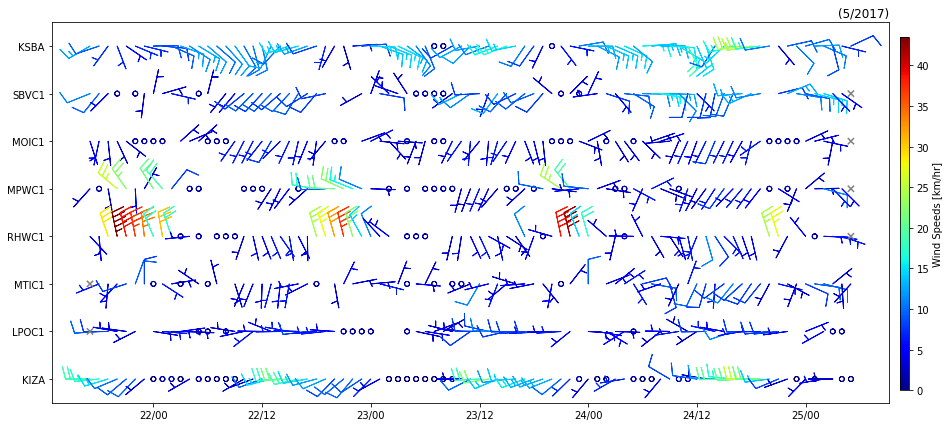

File saved as: /home/sbarc/students/coello/repos/classes/spring_2021/geog_288cj/plotting/outputs/figures/stations_wspd_1hrly_2017-05-21_17_to_2017-05-25_05.png 



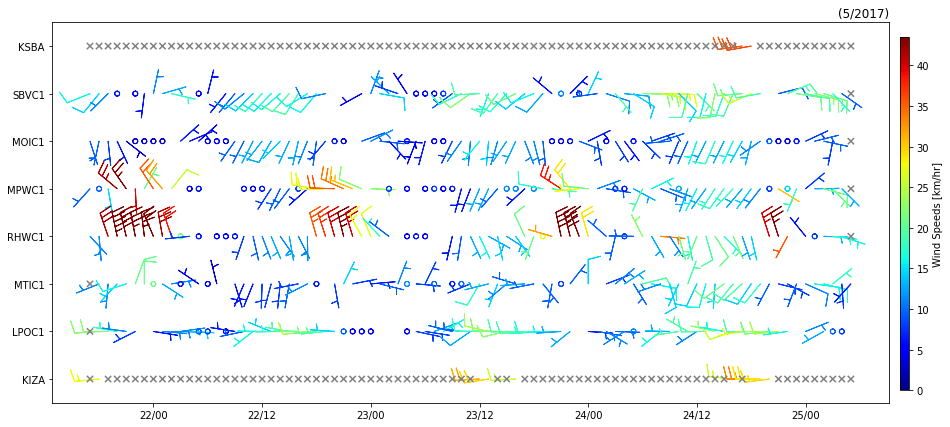

File saved as: /home/sbarc/students/coello/repos/classes/spring_2021/geog_288cj/plotting/outputs/figures/stations_wgust_1hrly_2017-05-21_17_to_2017-05-25_05.png 



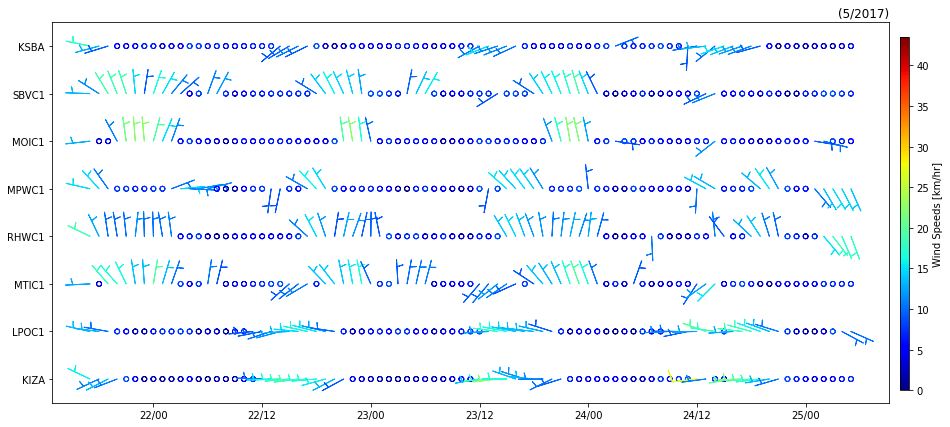

File saved as: /home/sbarc/students/coello/repos/classes/spring_2021/geog_288cj/plotting/outputs/figures/wrf_wspd_kmh_1hrly_2017-05-21_17_to_2017-05-25_05.png 



In [21]:
levels_wspd = [0, np.nanmax(da.wspd)]

station_order = [8, 7, 6, 5, 4, 3, 2, 1]

plot_station_barbs(da, da.time, 'wspd', stations, station_order, \
                   'Wind Speeds [' + wnd_units + ']', levels_wspd, 1, 'stations', (15,7), '', fig_outdir)

plot_station_barbs(da, da.time, 'wgust', stations, station_order, \
                   'Wind Speeds [' + wnd_units + ']', levels_wspd, 1, 'stations', (15,7), '', fig_outdir)

plot_station_barbs(dwrf, da.time, 'wspd_kmh', stations, station_order, \
                   'Wind Speeds [' + wnd_units + ']', levels_wspd, 1, 'wrf',(15,7), '', fig_outdir)

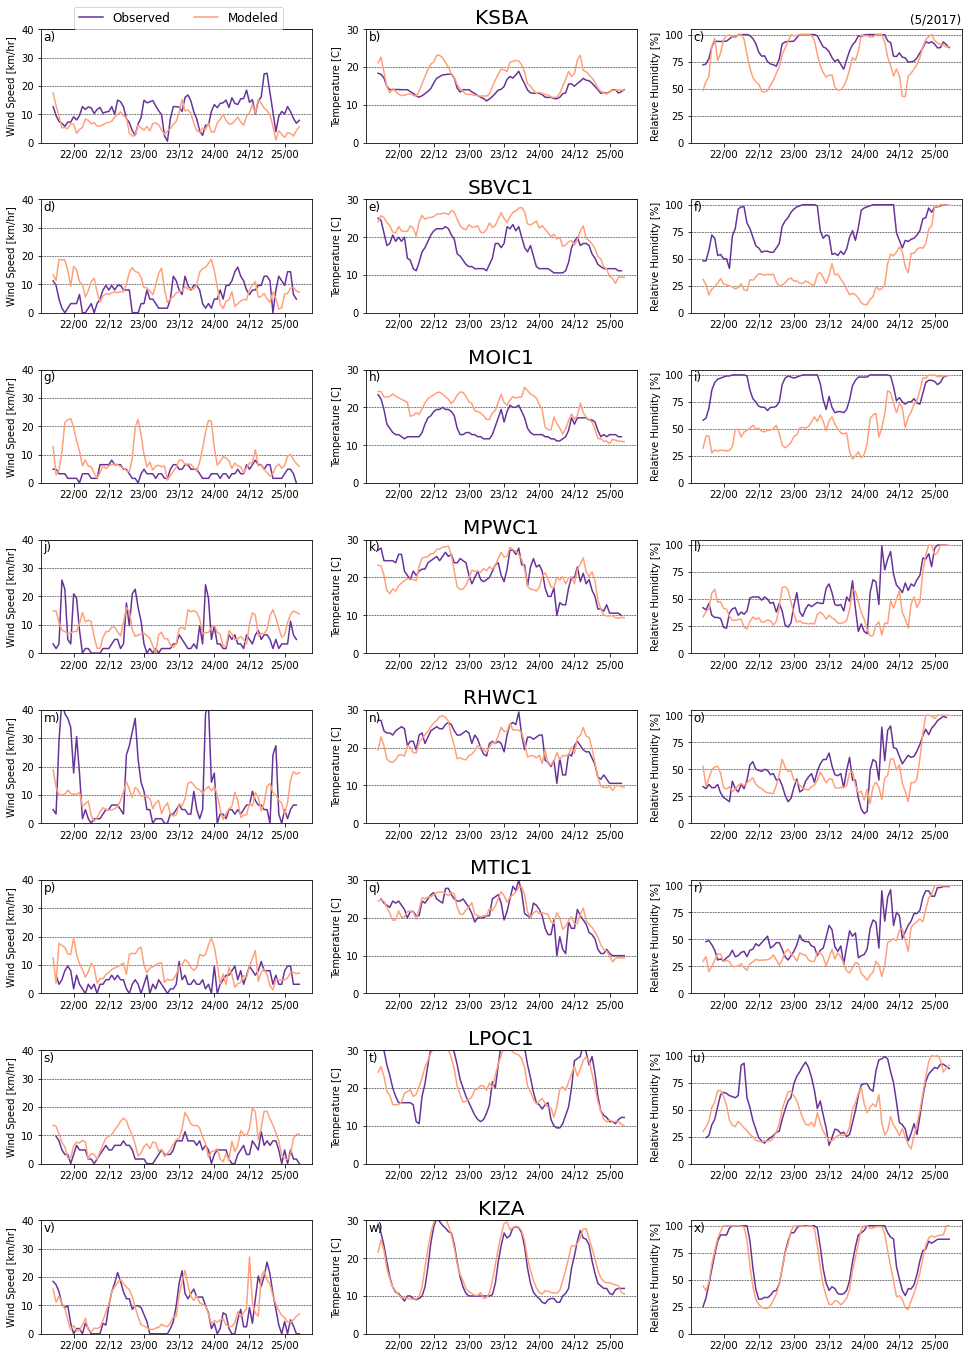

File saved as: /home/sbarc/students/coello/repos/classes/spring_2021/geog_288cj/plotting/outputs/figures/KSBA_SBVC1_MOIC1_MPWC1_RHWC1_MTIC1_LPOC1_KIZA_wspd_t_RH_2017-05-21_17_to_2017-05-25_05.png 



In [68]:
def plot_station_winds(data, wrf, date_time, stations, var, wrf_var, var_labs, var_lims, station_lab, leg_box, outdir, wind_untis):    
    
    var_names = ''
    stat_names = ''
    subfig = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)', 'j)', 'k)', 'l)', 'm)', 'n)', 'o)',
             'p)', 'q)', 'r)', 's)', 't)', 'u)', 'v)', 'w)', 'x)']
    
    k = 0
    
    # Create a new figure
    fig = plt.figure(figsize=(len(var) * 5.5, len(stations) * 3))       
    gs = plt.GridSpec(len(stations), len(var), figure=fig, hspace= 0.5, wspace=0.2)
    
    for i in range(len(stations)):
    
        for j in range(len(var)):
    
            ax = fig.add_subplot(gs[i,j])

            ln1 = ax.plot(data.time, data[var[j]].sel(station = stations[i]), 'rebeccapurple', label='Observed')

    #         ln3 = ax.plot(date_time, data.wgust.sel(station = stations[i]), 'mediumpurple', label='Obs. Gusts')


            ax.set_ylabel(var_labs[j], multialignment='center')
            ax.set_ylim(var_lims[j])

            ln2 = ax.plot(wrf.time, wrf[wrf_var[j]].sel(station = stations[i]), 'lightsalmon', label='Modeled')

            # make x laeled dates prettier
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%H'))

            if (i == 0 and j == len(var) - 1):
                plt.title('(' + str(date_time['time.month'].values[0]) + '/' + \
                          str(date_time['time.year'].values[0]) + ')', loc = 'right')

            # apply grid
            ax.grid(b=True, which='major', axis='y', color='k', linestyle='--', linewidth=0.5)

            ax.text(0.01, 0.9, subfig[k], fontsize = 12, transform = ax.transAxes)

            
            if (j == station_lab):
                plt.title(stations[i], loc = 'center', size = 20)

        
            if (i == 0 and j == 0):
                # add legend
                lns = ln1 + ln2
                labs = [l.get_label() for l in lns]
                ax.legend(lns, labs, loc='upper left',  bbox_to_anchor=leg_box, ncol=3, prop={'size': 12})
                
            if (i == 1):
                var_names = var_names + '_' + str(var[j])
                
                
            k += 1
            
        stat_names = stat_names + '_' + stations[i]
   
    # Save and display figure
    plot_name = stat_names[1:] + var_names + '_' + str(date_time.values[0])[:-16].replace('T', '_') + \
                '_to_' + str(date_time.values[-1])[:-16].replace('T', '_') + '.png'
    plt.savefig(outdir+plot_name,  bbox_inches='tight', dpi = 120)
    plt.show()
    print('File saved as:', outdir+plot_name, '\n')

    
station_vars = ['wspd', 't', 'RH']
wrf_vars = ['wspd_kmh', 'T2', 'rh2']
var_labels = ['Wind Speed [' + wnd_units + ']', 'Temperature [C]', 'Relative Humidity [%]']
var_lims = [(0,40), (0,30), (0,105)]
    
plot_station_winds(da, dwrf, da.time, stations,  station_vars, wrf_vars, var_labels, var_lims, 1, (0.1, 1.25), fig_outdir, wnd_units)

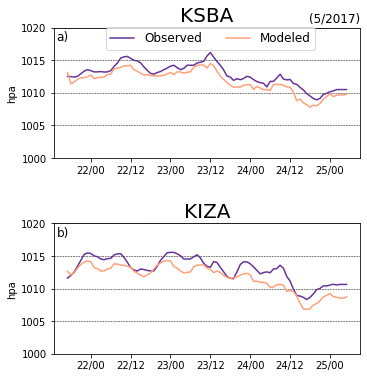

File saved as: /home/sbarc/students/coello/repos/classes/spring_2021/geog_288cj/plotting/outputs/figures/KSBA_KIZA_slp_2017-05-21_17_to_2017-05-25_05.png 



In [80]:
station_vars = ['slp']
wrf_vars = ['slp']
var_labels = ['hpa']
var_lims = [(1000, 1020)]

plot_station_winds(da, dwrf, da.time, ["KSBA", "KIZA"], station_vars, wrf_vars, var_labels, var_lims, 0, (0.15, 1.05), fig_outdir, wnd_units)